## Import packages

In [4]:
from vitrum.glass_Atoms import glass_Atoms
from vitrum.scattering import scattering

from ase.io import read
import matplotlib.pyplot as plt


## Load data

In [5]:
atoms = read("md.lammpstrj", index=":10" , format="lammps-dump-text")
atoms = [glass_Atoms(atom) for atom in atoms]

In [6]:
corr_atoms_dic = {1: 'Na', 2: 'O', 3:'Si'}
for atom in atoms:
    atom.set_new_chemical_symbols(corr_atoms_dic)

## S(Q)

In [7]:
qval, sq = scattering(atoms, rrange=15, qrange=30, nbin = 500).get_structure_factor()

Text(0, 0.5, 'S(Q)')

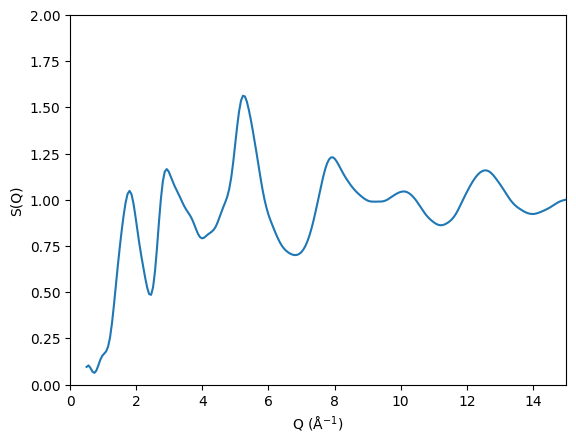

In [8]:
plt.plot(qval, sq)
plt.xlim(0,15)
plt.ylim(0,2)
plt.xlabel("Q (Å$^{-1}$)")
plt.ylabel("S(Q)")

## g(r)

In [9]:
rval, rdf = scattering(atoms).get_partial_pdf(['Si', 'O'], rrange=15, nbin = 500)

Text(0, 0.5, 'g(r)')

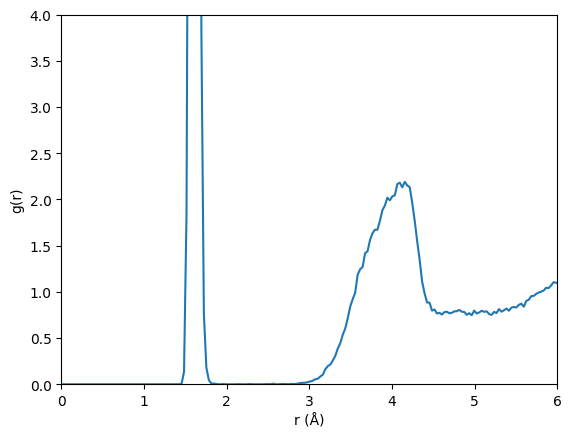

In [10]:
plt.plot(rval, rdf)
plt.xlim(0,6)
plt.ylim(0,4)
plt.xlabel("r (Å)")
plt.ylabel("g(r)")

## Qn

In [1]:
from collections import Counter
Counter(atoms[0].NBO_analysis('Si', 'O', ['Si'], cutoff = 2))

Counter({3: 339, 4: 238, 2: 109, 1: 13, 0: 1})

## Generating random structures

In [ ]:
from vitrum.utility import get_random_packed
atoms = get_random_packed(("LiFePO4", density=3, target_atoms=200, minAllowDis=1.5, mp_api_key=None, datatype="ase", seed=None))
